In [1]:
from colorama import Fore, Back, Style
from random import choice
import numpy as np
import matplotlib.pyplot as plt
import cv2
import argparse

import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D

In [2]:
def statement(stmnt):
    print(Fore.YELLOW, Back.LIGHTBLACK_EX, Style.BRIGHT, stmnt, Style.RESET_ALL)

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

# Loading the data into training and testing samples

In [5]:
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
xtest.shape

(10000, 28, 28)

# Crosschecking training and testing data with corresponding labels

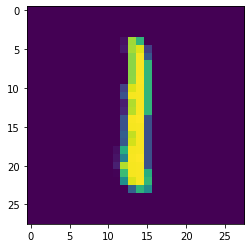

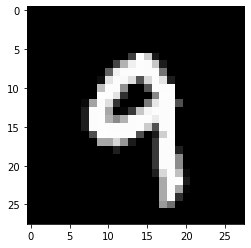

   Label Value At Index(31332) For Training Data = 1
    Label Value At Index(3190) For Testing Data = 9 


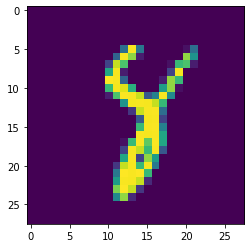

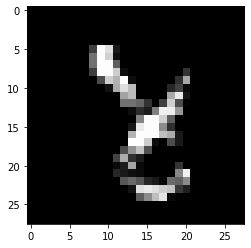

   Label Value At Index(47297) For Training Data = 8
    Label Value At Index(6625) For Testing Data = 8 


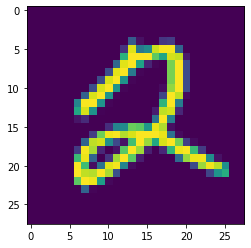

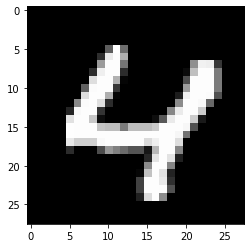

   Label Value At Index(58728) For Training Data = 2
    Label Value At Index(9565) For Testing Data = 4 


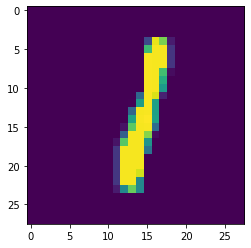

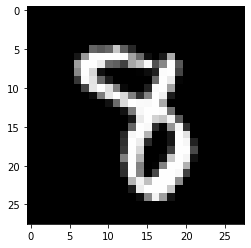

   Label Value At Index(49840) For Training Data = 1
    Label Value At Index(2425) For Testing Data = 8 


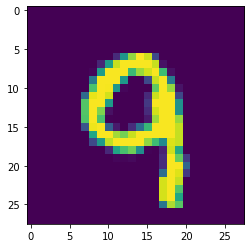

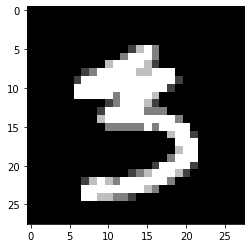

   Label Value At Index(8308) For Training Data = 9
    Label Value At Index(8308) For Testing Data = 3 


In [8]:
for j in range(5):
    i = choice(range(60000))
    plt.imshow(xtrain[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

In [9]:
xtrain.shape

(60000, 28, 28)

# Normalizing the data

In [10]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

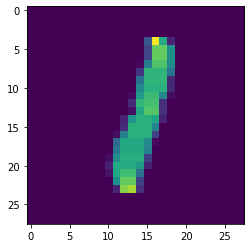

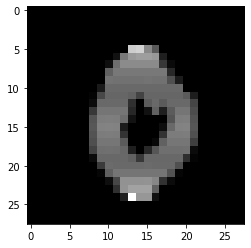

   Label Value At Index(33937) For Training Data = 1
    Label Value At Index(1273) For Testing Data = 0 


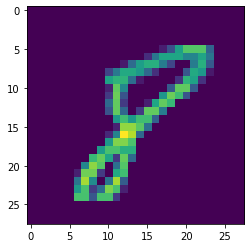

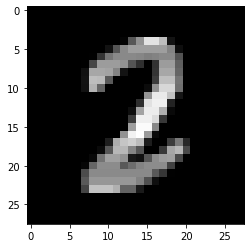

   Label Value At Index(40265) For Training Data = 8
    Label Value At Index(2242) For Testing Data = 2 


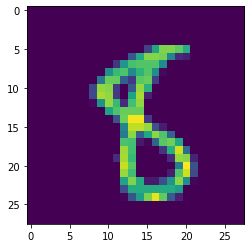

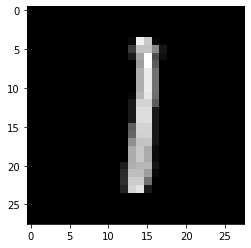

   Label Value At Index(11258) For Training Data = 8
    Label Value At Index(6848) For Testing Data = 1 


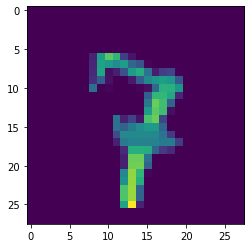

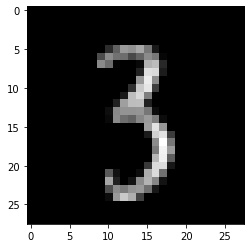

   Label Value At Index(55384) For Training Data = 7
    Label Value At Index(7675) For Testing Data = 3 


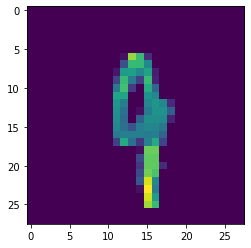

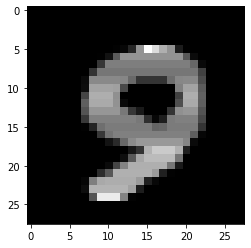

   Label Value At Index(35068) For Training Data = 9
    Label Value At Index(6112) For Testing Data = 9 


In [11]:
for j in range(5):
    i = choice(range(60000))
    plt.imshow(xtrain[i])
    plt.show()
    try:
        k = i
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    except IndexError:
        k = choice(range(10000))
        plt.imshow(xtest[k],cmap= plt.cm.binary_r)
    plt.show()
    stmnt = f'''label value at index({i}) for training data = {ytrain[i]}
    label value at index({k}) for testing data = {ytest[k]}'''.title()
    statement(stmnt)

# Reshaping the data with last point having the color setting set to grayscale

In [12]:
img = 28
xtrain = np.array(xtrain).reshape(-1, img, img, 1)
xtest = np.array(xtest).reshape(-1, img, img, 1)
statement(f'training shape : {xtrain.shape}'.title())
statement(f'testing shape : {xtest.shape}'.title())

   Training Shape : (60000, 28, 28, 1) 
   Testing Shape : (10000, 28, 28, 1) 


# Creating a convolutional neural network with 3 convolutional layers and 2 dense layer

In [13]:
model = Sequential([
    # Convolutional layers
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    Conv2D(64, (3,3), input_shape=xtrain.shape[1:], activation='relu'),
    MaxPooling2D(2),
    # Neural network
    Flatten(),
    # Hidden Layers
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    # Output Neuron
    Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [15]:
model.fit(xtrain,ytrain,epochs=20,validation_split=.3)

Epoch 1/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3352 - accuracy: 0.8898 - val_loss: 0.1452 - val_accuracy: 0.9556
Epoch 2/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.1078 - accuracy: 0.9670 - val_loss: 0.0818 - val_accuracy: 0.9744
Epoch 3/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 4/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0927 - val_accuracy: 0.9743
Epoch 5/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 6/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0538 - val_accuracy: 0.9846
Epoch 7/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0524 -

In [16]:
import pandas as pd
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.335199,0.889833,0.145236,0.955611
1,0.107781,0.966952,0.081783,0.974444
2,0.074729,0.976810,0.069591,0.979222
3,0.060520,0.981786,0.092721,0.974278
4,0.050227,0.984190,0.079969,0.976722
5,0.042575,0.986762,0.053821,0.984611
6,0.036050,0.988048,0.052376,0.985111
7,0.029914,0.990381,0.050317,0.985444
8,0.027254,0.991643,0.058379,0.983667
9,0.024181,0.992238,0.055732,0.985611


In [17]:
ypred = model.predict(xtest)

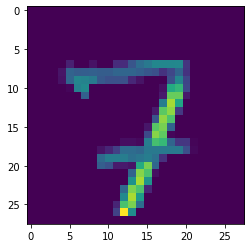

   The Actual Label At Index(3936) 7
    Predicted Value At Index(3936) 7 


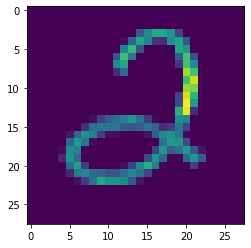

   The Actual Label At Index(1374) 2
    Predicted Value At Index(1374) 2 


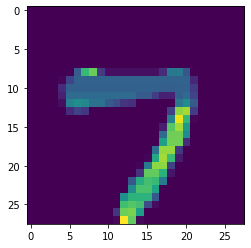

   The Actual Label At Index(5422) 7
    Predicted Value At Index(5422) 7 


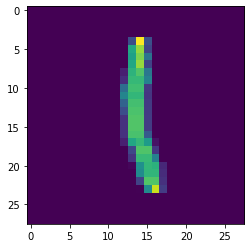

   The Actual Label At Index(949) 1
    Predicted Value At Index(949) 1 


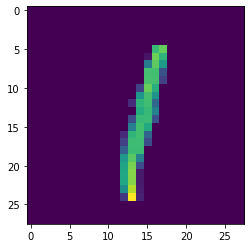

   The Actual Label At Index(1659) 1
    Predicted Value At Index(1659) 1 


In [18]:
for j in range(5):
    i = choice(range(10000))
    plt.imshow(xtest[i])
    plt.show()    
    stmnt=f'''the actual label at index({i}) {ytest[i]}
    predicted value at index({i}) {np.argmax(ypred[i])}'''.title()
    statement(stmnt)

# The first model

In [19]:
test_loss, test_acc = model.evaluate(xtest,ytest)
statement(f'test loss on {len(xtest)} test smaples {test_loss}'.title())
statement(f'validation accuracy on {len(xtest)} test smaples {test_acc*100}'.title())

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9858
   Test Loss On 10000 Test Smaples 0.06810879707336426 
   Validation Accuracy On 10000 Test Smaples 98.580002784729 


In [20]:
model.save('./Digit Identification/model')

INFO:tensorflow:Assets written to: model\assets


In [21]:
batch_size = 128
num_classes = 10
epochs = 10

(xtrain1, ytrain1), (xtest1, ytest1) = mnist.load_data()
print(xtrain1.shape, ytrain1.shape)

xtrain1 = xtrain1.reshape(xtrain1.shape[0], 28, 28, 1)
xtest1 = xtest1.reshape(xtest1.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

ytrain1 = tf.keras.utils.to_categorical(ytrain1, num_classes)
ytest1 = tf.keras.utils.to_categorical(ytest1, num_classes)
xtrain1 = xtrain1.astype('float32')
xtest1 = xtest1.astype('float32')
xtrain1 /= 255
xtest1 /= 255
print('xtrain1 shape:', xtrain1.shape)
print(xtrain1.shape[0], 'train samples')
print(xtest1.shape[0], 'test samples')

(60000, 28, 28) (60000,)
xtrain1 shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# A model with 2 convolutional layers and 1 dense layer

In [22]:
model1 = Sequential([
(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=xtrain1.shape[1:])),
(Conv2D(64, (3, 3), activation='relu')),
(MaxPooling2D(pool_size=(2, 2))),
(Dropout(0.25)),
(Flatten()),
(Dense(256, activation='relu')),
(Dropout(0.5)),
(Dense(num_classes, activation='softmax')),
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2359552   
                                                      

In [23]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# model.fit(xtrain1,ytrain1,epochs=5,validation_split=.3)
model1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model1.fit(xtrain1, ytrain1,batch_size=batch_size,epochs=20,verbose=1,validation_data=(xtest1, ytest1))

Epoch 1/20
469/469 [==============================] - 39s 82ms/step - loss: 2.2740 - accuracy: 0.1674 - val_loss: 2.2279 - val_accuracy: 0.4276
Epoch 2/20
469/469 [==============================] - 38s 82ms/step - loss: 2.1949 - accuracy: 0.3257 - val_loss: 2.1287 - val_accuracy: 0.6034
Epoch 3/20
469/469 [==============================] - 39s 82ms/step - loss: 2.0868 - accuracy: 0.4547 - val_loss: 1.9823 - val_accuracy: 0.6912
Epoch 4/20
469/469 [==============================] - 39s 82ms/step - loss: 1.9237 - accuracy: 0.5486 - val_loss: 1.7704 - val_accuracy: 0.7372
Epoch 5/20
469/469 [==============================] - 39s 83ms/step - loss: 1.7083 - accuracy: 0.6038 - val_loss: 1.5032 - val_accuracy: 0.7622
Epoch 6/20
469/469 [==============================] - 38s 81ms/step - loss: 1.4644 - accuracy: 0.6484 - val_loss: 1.2289 - val_accuracy: 0.7877
Epoch 7/20
469/469 [==============================] - 38s 80ms/step - loss: 1.2432 - accuracy: 0.6814 - val_loss: 1.0056 - val_accuracy:

In [24]:
pd.DataFrame(model1.history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.273957,0.167433,2.227886,0.4276
1,2.194861,0.325750,2.128700,0.6034
2,2.086833,0.454667,1.982253,0.6912
3,1.923714,0.548567,1.770426,0.7372
4,1.708276,0.603767,1.503237,0.7622
5,1.464406,0.648350,1.228917,0.7877
6,1.243248,0.681367,1.005592,0.8055
7,1.074500,0.707500,0.844664,0.8208
8,0.954472,0.730783,0.733101,0.8327
9,0.863376,0.748817,0.653638,0.8443


# Second model

In [25]:
score = model1.evaluate(xtest1, ytest1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3920471668243408
Test accuracy: 0.8928999900817871


In [26]:
model1.save('./Digit Identification/tkinter_model')

INFO:tensorflow:Assets written to: tkinter_model\assets


In [27]:
def predict(file,model,frame_speed=1):
    preds = []
    ext = file.split('.')[-1]
    if ext in 'mp4,ts'.split(','):
        font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
        size = 1.5

        vid = cv2.VideoCapture(file)

        if not vid.isOpened():
            vid = cv2.VideoCapture(0)
        if not vid.isOpened():
            raise IOError('File Not Open')

        text = 'some text in a box!'.title()
        text_width,text_height=cv2.getTextSize(text,font,fontScale=size,thickness=1)[0]


        counter = 0
        while True:
            ret, frame = vid.read()
            counter+=1;
            if (counter%frame_speed)==0:
                try:
                    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                except:
                    break
                resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

                # txt_off_x = 5
                # txt_off_y = gray.shape[0]-25
                # box = ((txt_off_x,txt_off_y), (txt_off_x+text_width+1,txt_off_y-text_height-5))

                img = tf.keras.utils.normalize(resized)
                img = np.array(img).reshape(-1,28,28,1)
                pred = model.predict(img)
                status = np.argmax(pred)
                # print(status)
                # print(type(status))
                preds.append(status)
                x1,y1,w1,h1 = 0,0,175,175
                cv2.rectangle(frame,(x1,x1),(x1+100,y1+100),(0,0,0),-1)
                cv2.putText(frame,status.astype(str),(x1+int(w1/5),y1+int(h1/2)),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,.7,(0,0,255),2)

                cv2.imshow('handwritten digits recognition',frame)

                if cv2.waitKey(2)&0xFF==ord('q'):
                    break
        vid.release()
        cv2.destroyAllWindows()
        return preds
    
    elif ext in 'png,jpeg'.split(','):
        img = cv2.imread(file)
        plt.imshow(img)
        plt.show()
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.show()
        img = cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
        plt.imshow(img)
        plt.show()
        img = tf.keras.utils.normalize(img)
        img = np.array(img).reshape(-1,28,28,1)
        pred = model.predict(img)
        print('the model identified the digit in the image as'.title(),end='')
        statement(np.argmax(pred))

# A small demonsteration

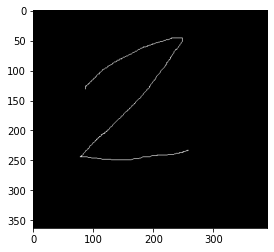

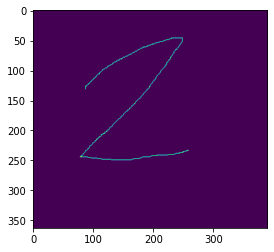

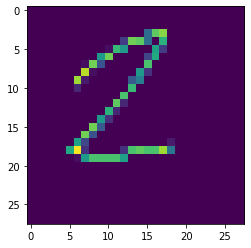

The Model Identified The Digit In The Image As   2 


In [35]:
predict('./myImage/2.png',model,frame_speed=1)

In [37]:
li = predict('./myImage/2022-02-02-18-10-28.mp4',model)
li

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 7,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 7,
 7,
 7,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 7,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
